In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
%matplotlib inline

In [38]:
x_set=[]
pw=[0.3]

In [39]:
# full gaussian pulse 
T=np.linspace(-3,3,10000)
dt=T[1]-T[0]
for i in range(len(pw)):
    x=np.zeros(len(T))
    for j in range(len(T)):
        x[j]=math.exp(-(T[j]/(math.sqrt(2)*(pw[i]/2.355)))**2)
    x_set.append(x)

In [40]:
# gaussian sudden stop
T=np.linspace(-3,3,10000)
dt=T[1]-T[0]
for i in range(len(pw)):
    x=np.zeros(len(T))
    for j in range(int(len(T)/2)):
        x[j]=math.exp(-(T[j]/(math.sqrt(2)*(pw[i]/2.355)))**2)
    x_set.append(x)

In [41]:
# # gaussian sustain
T=np.linspace(-3,3,10000)
Tfact=T-min(T)
dt=T[1]-T[0]
for i in range(len(pw)):
    x=np.ones(len(T))
    for j in range(int(len(T)/2)):
        x[j]=math.exp(-(T[j]/(math.sqrt(2)*(pw[i]/2.355)))**2)
    x_set.append(x)

(-3.3, 3.3)

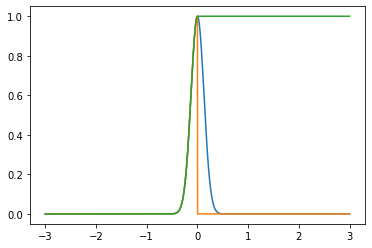

In [42]:
for i in range(np.size(x_set,0)):
    plt.plot(T,x_set[i])
plt.xlim()

In [43]:
y_set=[]
z_set=[]
for i in range(np.size(x_set,0)):
    x=x_set[i]
#     alpha = 60.
#     beta =  2
#     K = 30.
#     g = 30.
    alpha = 20
    beta =  1
    K = 20
    g = 10
    y=np.zeros(len(T))
    z=np.zeros(len(T))
    for j in range(len(T)-1):
        dy=dt*(-alpha*y[j]+K*(x[j]-z[j]))
        dz=dt*(-beta*z[j]+g*y[j])
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
    y_set.append(y)
    z_set.append(z)

In [44]:
# same scale
for i in range(np.size(x_set,0)):
    x_set[i]=x_set[i]/np.std(x_set[i])
    y_set[i]=y_set[i]/np.std(y_set[i])
    z_set[i]=z_set[i]/np.std(z_set[i])

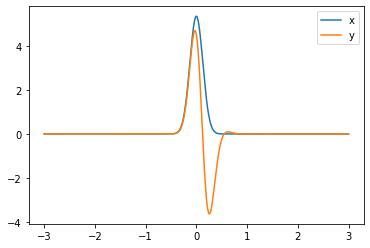

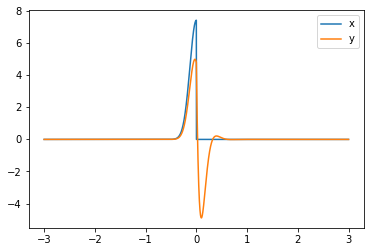

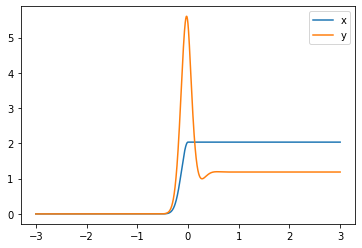

In [45]:
for i in range(np.size(x_set,0)):
    plt.plot(T,x_set[i])
    plt.plot(T,y_set[i])
#     plt.plot(T,z_set[i])
    plt.xlim()
    plt.legend(('x','y'))
    plt.show()

Text(0, 0.5, 'Response \n (Arbitrary Unit)')

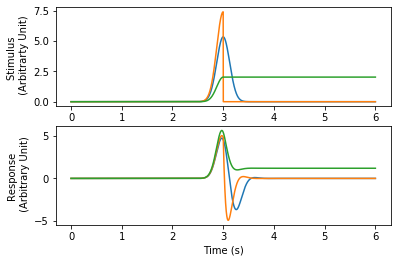

In [46]:
plt.subplot(2,1,1)
for i in range(np.size(x_set,0)):
    plt.plot(Tfact,x_set[i])
plt.xlim()
plt.xlabel('Time (s)')
plt.ylabel('Stimulus \n (Arbitrarty Unit)')

plt.subplot(2,1,2)
for i in range(np.size(x_set,0)):
    plt.plot(Tfact,y_set[i])
plt.xlabel('Time (s)')
plt.ylabel('Response \n (Arbitrary Unit)')


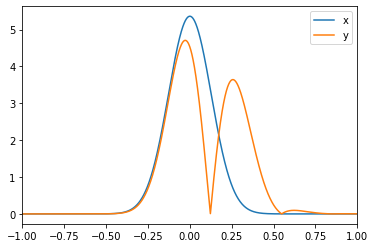

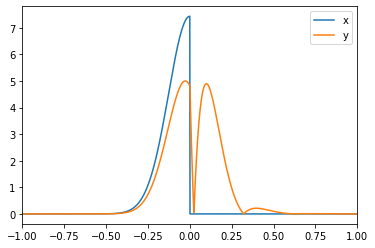

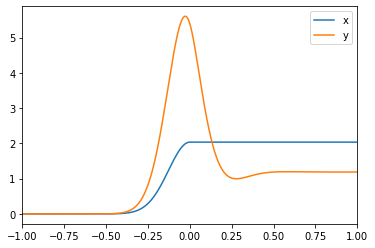

In [50]:
for i in range(np.size(x_set,0)):
    plt.plot(T,x_set[i])
    plt.plot(T,np.sqrt((y_set[i])**2))
#     plt.plot(T,z_set[i])
    plt.xlim(-1,1)
    plt.legend(('x','y'))
    plt.show()